In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

1.12.0


In [4]:
num_words=10000
(train_data,train_labels),(test_data, test_labels)=keras.datasets.imdb.load_data(num_words=num_words)

def multi_hot_sequences(sequences,dimension):
    results=np.zeros((len(sequences),dimension))
    for i,word_indices in enumerate(sequences):
        results[i,word_indices]=1.0
        return results

#print(train_data[0])
train_data.shape
train_data=multi_hot_sequences(train_data, num_words)
test_data=multi_hot_sequences(test_data, num_words)
#print(train_data[0])
train_data.shape

(25000, 10000)

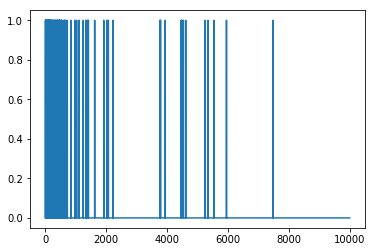

In [5]:
plt.plot(train_data[0])

In [6]:
#过拟合
#深度学习模型往往善于与训练数据你和，但关键是要泛化，而不是拟合
#确定模型大小，规律，由小到大，知道看到验证的损失不断减小为止
basemodel=keras.Sequential([keras.layers.Dense(16,activation=tf.nn.relu,input_shape=(num_words,)),
                          keras.layers.Dense(16,activation=tf.nn.relu),
                          keras.layers.Dense(1,activation=tf.nn.sigmoid)])
basemodel.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy','binary_crossentropy'])
basemodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [12]:
#训练模型
base_history=basemodel.fit(train_data,train_labels,
             epochs=20,batch_size=512,
             validation_data=(test_data,test_labels),
             verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 6s - loss: 0.6931 - acc: 0.4958 - binary_crossentropy: 0.6931 - val_loss: 0.6932 - val_acc: 0.5000 - val_binary_crossentropy: 0.6932
Epoch 2/20
 - 9s - loss: 0.6931 - acc: 0.5007 - binary_crossentropy: 0.6931 - val_loss: 0.6932 - val_acc: 0.5000 - val_binary_crossentropy: 0.6932
Epoch 3/20
 - 8s - loss: 0.6931 - acc: 0.5000 - binary_crossentropy: 0.6931 - val_loss: 0.6932 - val_acc: 0.5000 - val_binary_crossentropy: 0.6932
Epoch 4/20
 - 6s - loss: 0.6931 - acc: 0.4938 - binary_crossentropy: 0.6931 - val_loss: 0.6932 - val_acc: 0.5000 - val_binary_crossentropy: 0.6932
Epoch 5/20
 - 4s - loss: 0.6931 - acc: 0.5001 - binary_crossentropy: 0.6931 - val_loss: 0.6932 - val_acc: 0.5000 - val_binary_crossentropy: 0.6932
Epoch 6/20
 - 4s - loss: 0.6931 - acc: 0.4970 - binary_crossentropy: 0.6931 - val_loss: 0.6932 - val_acc: 0.5000 - val_binary_crossentropy: 0.6932
Epoch 7/20
 - 5s - loss: 0.6931 - acc: 0.4953 - binary_crossentropy:

In [13]:
#上面的模型损失达到了0.6931，准确度也不高。。。。
#创建一个更大的模型
bigger_model=keras.Sequential([keras.layers.Dense(512,activation=tf.nn.relu,input_shape=(num_words,)),
                              keras.layers.Dense(512,activation=tf.nn.relu),
                             keras.layers.Dense(1,activation=tf.nn.sigmoid)])
bigger_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy','binary_crossentropy'])
bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [15]:
#训练模型
bigger_history=bigger_model.fit(train_data,train_labels,
                epochs=20,batch_size=512,
                validation_data=(test_data,test_labels),
                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 18s - loss: 0.6932 - acc: 0.4996 - binary_crossentropy: 0.6932 - val_loss: 0.6932 - val_acc: 0.5000 - val_binary_crossentropy: 0.6932
Epoch 2/20
 - 10s - loss: 0.6931 - acc: 0.5010 - binary_crossentropy: 0.6931 - val_loss: 0.6932 - val_acc: 0.5000 - val_binary_crossentropy: 0.6932
Epoch 3/20
 - 10s - loss: 0.6931 - acc: 0.5002 - binary_crossentropy: 0.6931 - val_loss: 0.6932 - val_acc: 0.5000 - val_binary_crossentropy: 0.6932
Epoch 4/20
 - 10s - loss: 0.6931 - acc: 0.4972 - binary_crossentropy: 0.6931 - val_loss: 0.6932 - val_acc: 0.5000 - val_binary_crossentropy: 0.6932
Epoch 5/20
 - 10s - loss: 0.6931 - acc: 0.4986 - binary_crossentropy: 0.6931 - val_loss: 0.6932 - val_acc: 0.5000 - val_binary_crossentropy: 0.6932
Epoch 6/20
 - 10s - loss: 0.6931 - acc: 0.4935 - binary_crossentropy: 0.6931 - val_loss: 0.6932 - val_acc: 0.5000 - val_binary_crossentropy: 0.6932
Epoch 7/20
 - 10s - loss: 0.6932 - acc: 0.4959 - binary_crosse

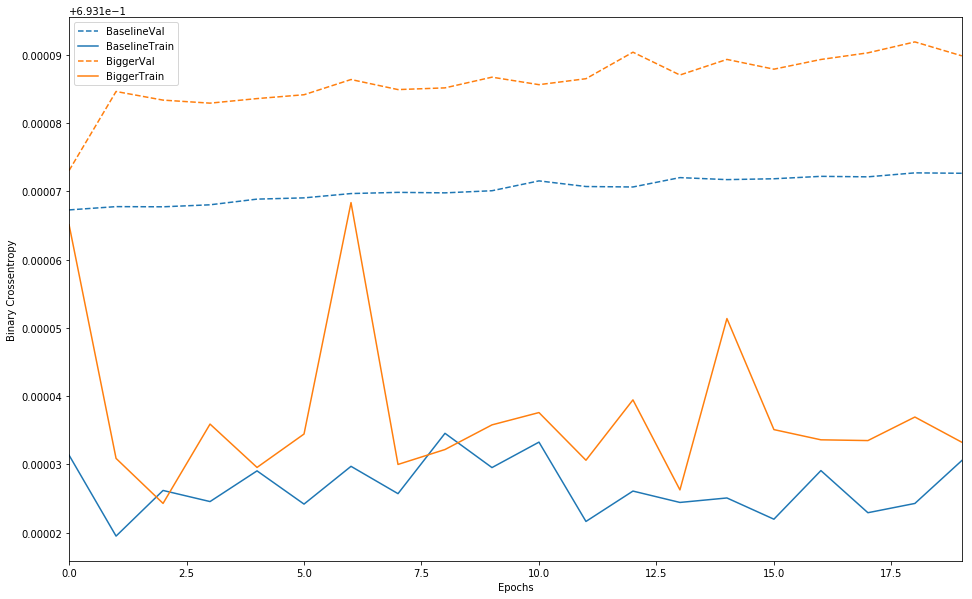

In [16]:
#绘制训练损失和验证损失图表
def plot_history(histories,key='binary_crossentropy'):
    plt.figure(figsize=(16,10))
    for name, history in histories:
        val=plt.plot(history.epoch,history.history['val_'+key],'--',label=name.title()+'Val')
        plt.plot(history.epoch,history.history[key],color=val[0].get_color(),
                label=name.title()+'Train')
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()
    plt.xlim([0,max(history.epoch)])
    
plot_history([('baseline',base_history),('bigger',bigger_history)])

In [18]:
#呀，这个数据好奇怪
#还是用它来试试过拟合吧
l2_model=keras.models.Sequential([
    keras.layers.Dense(16,kernel_regularizer=keras.regularizers.l2(0.001),
                      activation=tf.nn.relu, input_shape=(num_words,)),
    keras.layers.Dense(16,kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
])
l2_model.compile(optimizer='adam',loss='binary_crossentropy',
                metrics=['accuracy','binary_crossentropy'])
l2_model_history=l2_model.fit(train_data,test_labels,
                             epochs=20,batch_size=512,
                             validation_data=(test_data,test_labels),
                             verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 7s - loss: 0.7126 - acc: 0.4953 - binary_crossentropy: 0.6932 - val_loss: 0.7051 - val_acc: 0.5000 - val_binary_crossentropy: 0.6931
Epoch 2/20
 - 5s - loss: 0.7032 - acc: 0.4949 - binary_crossentropy: 0.6932 - val_loss: 0.7014 - val_acc: 0.5000 - val_binary_crossentropy: 0.6931
Epoch 3/20
 - 4s - loss: 0.7001 - acc: 0.4962 - binary_crossentropy: 0.6932 - val_loss: 0.6989 - val_acc: 0.5000 - val_binary_crossentropy: 0.6931
Epoch 4/20
 - 4s - loss: 0.6979 - acc: 0.5000 - binary_crossentropy: 0.6932 - val_loss: 0.6970 - val_acc: 0.5000 - val_binary_crossentropy: 0.6931
Epoch 5/20
 - 4s - loss: 0.6964 - acc: 0.4988 - binary_crossentropy: 0.6931 - val_loss: 0.6957 - val_acc: 0.5000 - val_binary_crossentropy: 0.6931
Epoch 6/20
 - 4s - loss: 0.6953 - acc: 0.4956 - binary_crossentropy: 0.6932 - val_loss: 0.6948 - val_acc: 0.5000 - val_binary_crossentropy: 0.6931
Epoch 7/20
 - 4s - loss: 0.6945 - acc: 0.4977 - binary_crossentropy:

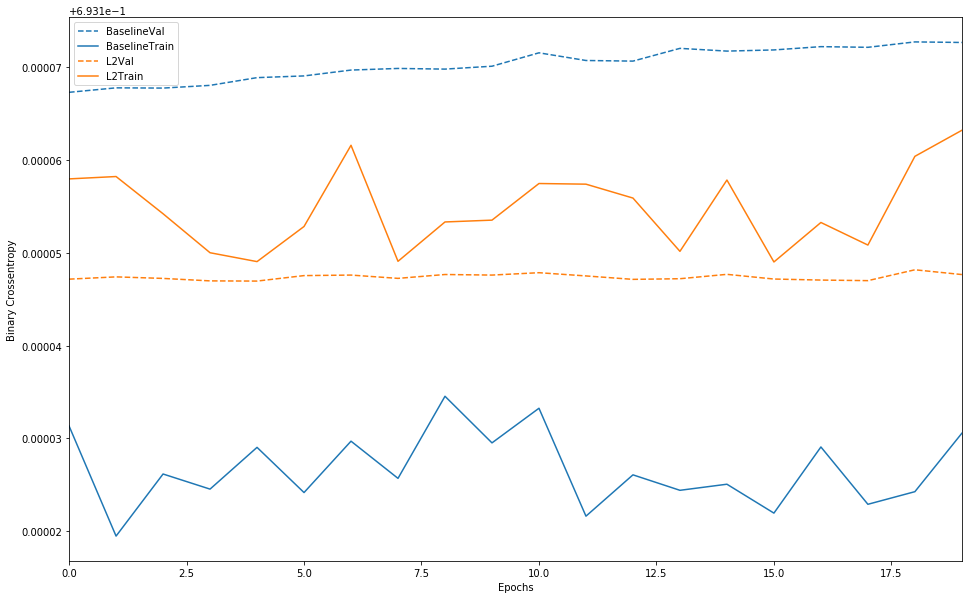

In [19]:
plot_history([('baseline',base_history),
             ('l2',l2_model_history)])

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 6s - loss: 0.6932 - acc: 0.4998 - binary_crossentropy: 0.6932 - val_loss: 0.6931 - val_acc: 0.5000 - val_binary_crossentropy: 0.6931
Epoch 2/20
 - 4s - loss: 0.6932 - acc: 0.4965 - binary_crossentropy: 0.6932 - val_loss: 0.6931 - val_acc: 0.5000 - val_binary_crossentropy: 0.6931
Epoch 3/20
 - 4s - loss: 0.6932 - acc: 0.4973 - binary_crossentropy: 0.6932 - val_loss: 0.6931 - val_acc: 0.5000 - val_binary_crossentropy: 0.6931
Epoch 4/20
 - 4s - loss: 0.6932 - acc: 0.5003 - binary_crossentropy: 0.6932 - val_loss: 0.6931 - val_acc: 0.5000 - val_binary_crossentropy: 0.6931
Epoch 5/20
 - 4s - loss: 0.6932 - acc: 0.4944 - binary_crossentropy: 0.6932 - val_loss: 0.6931 - val_acc: 0.5000 - val_binary_crossentropy: 0.6931
Epoch 6/20
 - 4s - loss: 0.6931 - acc: 0.4945 - binary_crossentropy: 0.6931 - val_loss: 0.6931 - val_acc: 0.5000 - val_binary_crossentropy: 0.6931
Epoch 7/20
 - 4s - loss: 0.6931 - acc: 0.4966 - binary_crossentropy:

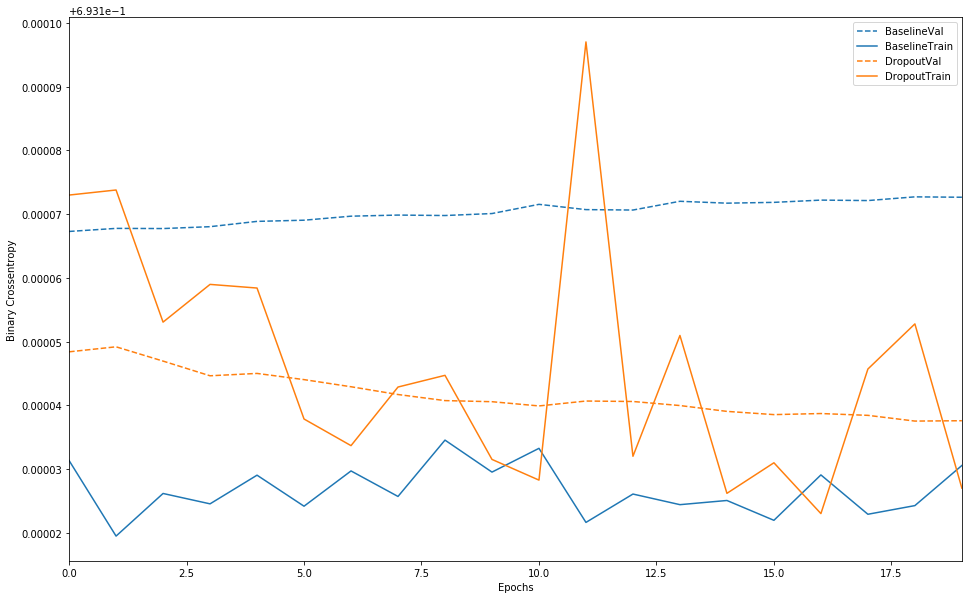

In [23]:
#dropout方法
dropout_model=keras.models.Sequential([
    keras.layers.Dense(16,activation=tf.nn.relu, input_shape=(num_words,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16,activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
])
dropout_model.compile(optimizer='adam',loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])
dropout_model_history=dropout_model.fit(train_data,test_labels,
                             epochs=20,batch_size=512,
                             validation_data=(test_data,test_labels),
                             verbose=2)


plot_history([('baseline', base_history),
              ('dropout', dropout_model_history)])